In [1]:
%matplotlib notebook

In this notebook we grab representative, beautiful tracks and get them publication ready.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import imageio
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.font_manager as fm
import json
import matplotlib as mpl
from matplotlib import ticker
from IPython.display import Image
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable, axes_size
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
# This will change to the default sans-serif font
plt.rcParams["font.family"] = "sans-serif"
# This defines that the default will be Helvetica
#plt.rcParams["font.sans-serif"] = "Arial"
import os
from pathlib import Path

In [3]:
home_path = os.getcwd()

In [8]:
# all the figures will be saved in this folder
target_path = Path('plots/')
data_path = Path('data/')
os.chdir(home_path)
Path(target_path).mkdir(parents=True, exist_ok=True) 

In [9]:
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

Get the script that Matthieu used  for his NatNeuro paper back in 2008 to simulate the isoamyl-acetate diffusion. Translated it to Python (find in same folder as this script: continous_1Source_PetriDish.py). The script gives both the simulation time series as a plot and as a numpy file.

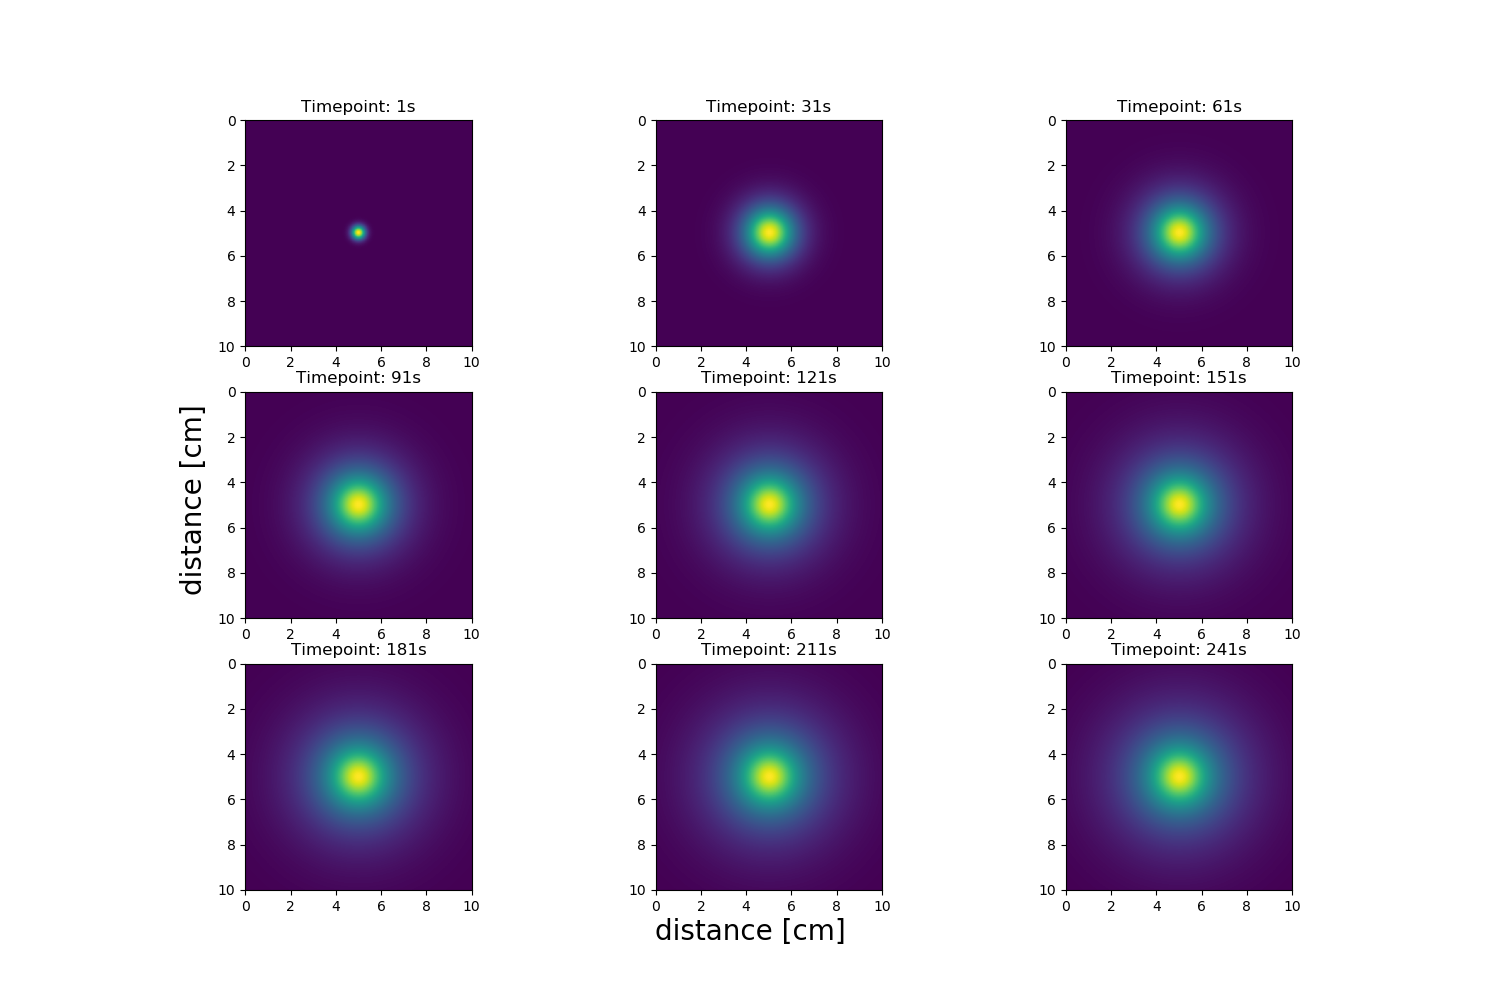

In [11]:
os.chdir(home_path)
os.chdir(data_path)
Image(filename = "Timeseries of diffusion.png") #, width=100, height=100)

In [12]:
# now we load the array of the third timepoint - it's an approximation as I leave the wait for ~30-60 seconds after
# putting the odor before I put the animal. It's a pitty papers don't take video-figures...
os.chdir(home_path)
os.chdir(data_path)
real_odor_gradient = \
    np.load('diffusion_time_series.npy')[2,:,:]
# Taking the data from Matthieu's 2008 paper - I have to scale the maximum of the simulated odor source
upscale_factor = 100/np.amax(real_odor_gradient)
real_odor_gradient *= upscale_factor

In [26]:
data_path_IAA = Path('data/MS74xMS133/original/IAA/2019.11.17_16-50-35_MS74xMS133/')
os.chdir(home_path)
os.chdir(data_path_IAA)
background = imageio.imread('Background.jpg')
head_positions = np.load('heads.npy')
with open(('experiment_settings.json'), 'r') as file:
    experiment_settings = json.load(file)
    pixel_per_mm = experiment_settings['Pixel per mm']
    recording_time = experiment_settings['Recording time']
    fps = experiment_settings['Framerate']
    source_x = experiment_settings['Source x']
    source_y = experiment_settings['Source y']

In [27]:
# As the simulation of the odor is in cm, and our px/mm is in ... well mm, correct that
pixel_per_cm = pixel_per_mm*10

# the maximum in the calculated odor gradient is of course at 500,500
simulated_odor_max_x = 500
simulated_odor_max_y = 500

# one pixel in the calculated odor gradient is...1x10^-4m...as the diameter_vector is defined as 10cm and has 0.01 steps 
# we end up with 0.1mm/px
sim_pixel_per_mm = 10

# see whether the dish is 10cm or less
ten_cm = True
if background.shape[0]/pixel_per_cm >= 10:
    # doing the int(round()) makes it imprecise of course! Should be ok as we should only be off by maximum half a pixel and 
    # this is for visualization only!
    ten_cm_index_relative_to_real_source_y = np.asarray((int(round(source_y - (pixel_per_cm*5))), \
                                                         int(round(source_y + (pixel_per_cm*5)))))
    ten_cm_index_relative_to_real_source_x = np.asarray((int(round(source_x - (pixel_per_cm*5))), \
                                                         int(round(source_x + (pixel_per_cm*5)))))
elif background.shape[0]/pixel_per_cm >=8:
    ten_cm = False
    eight_cm_index_relative_to_real_source_y = np.asarray((int(round(source_y - (pixel_per_cm*4))), \
                                                         int(round(source_y + (pixel_per_cm*4)))))
    eight_cm_index_relative_to_real_source_x = np.asarray((int(round(source_x - (pixel_per_cm*4))), \
                                                         int(round(source_x + (pixel_per_cm*4)))))


<IPython.core.display.Javascript object>


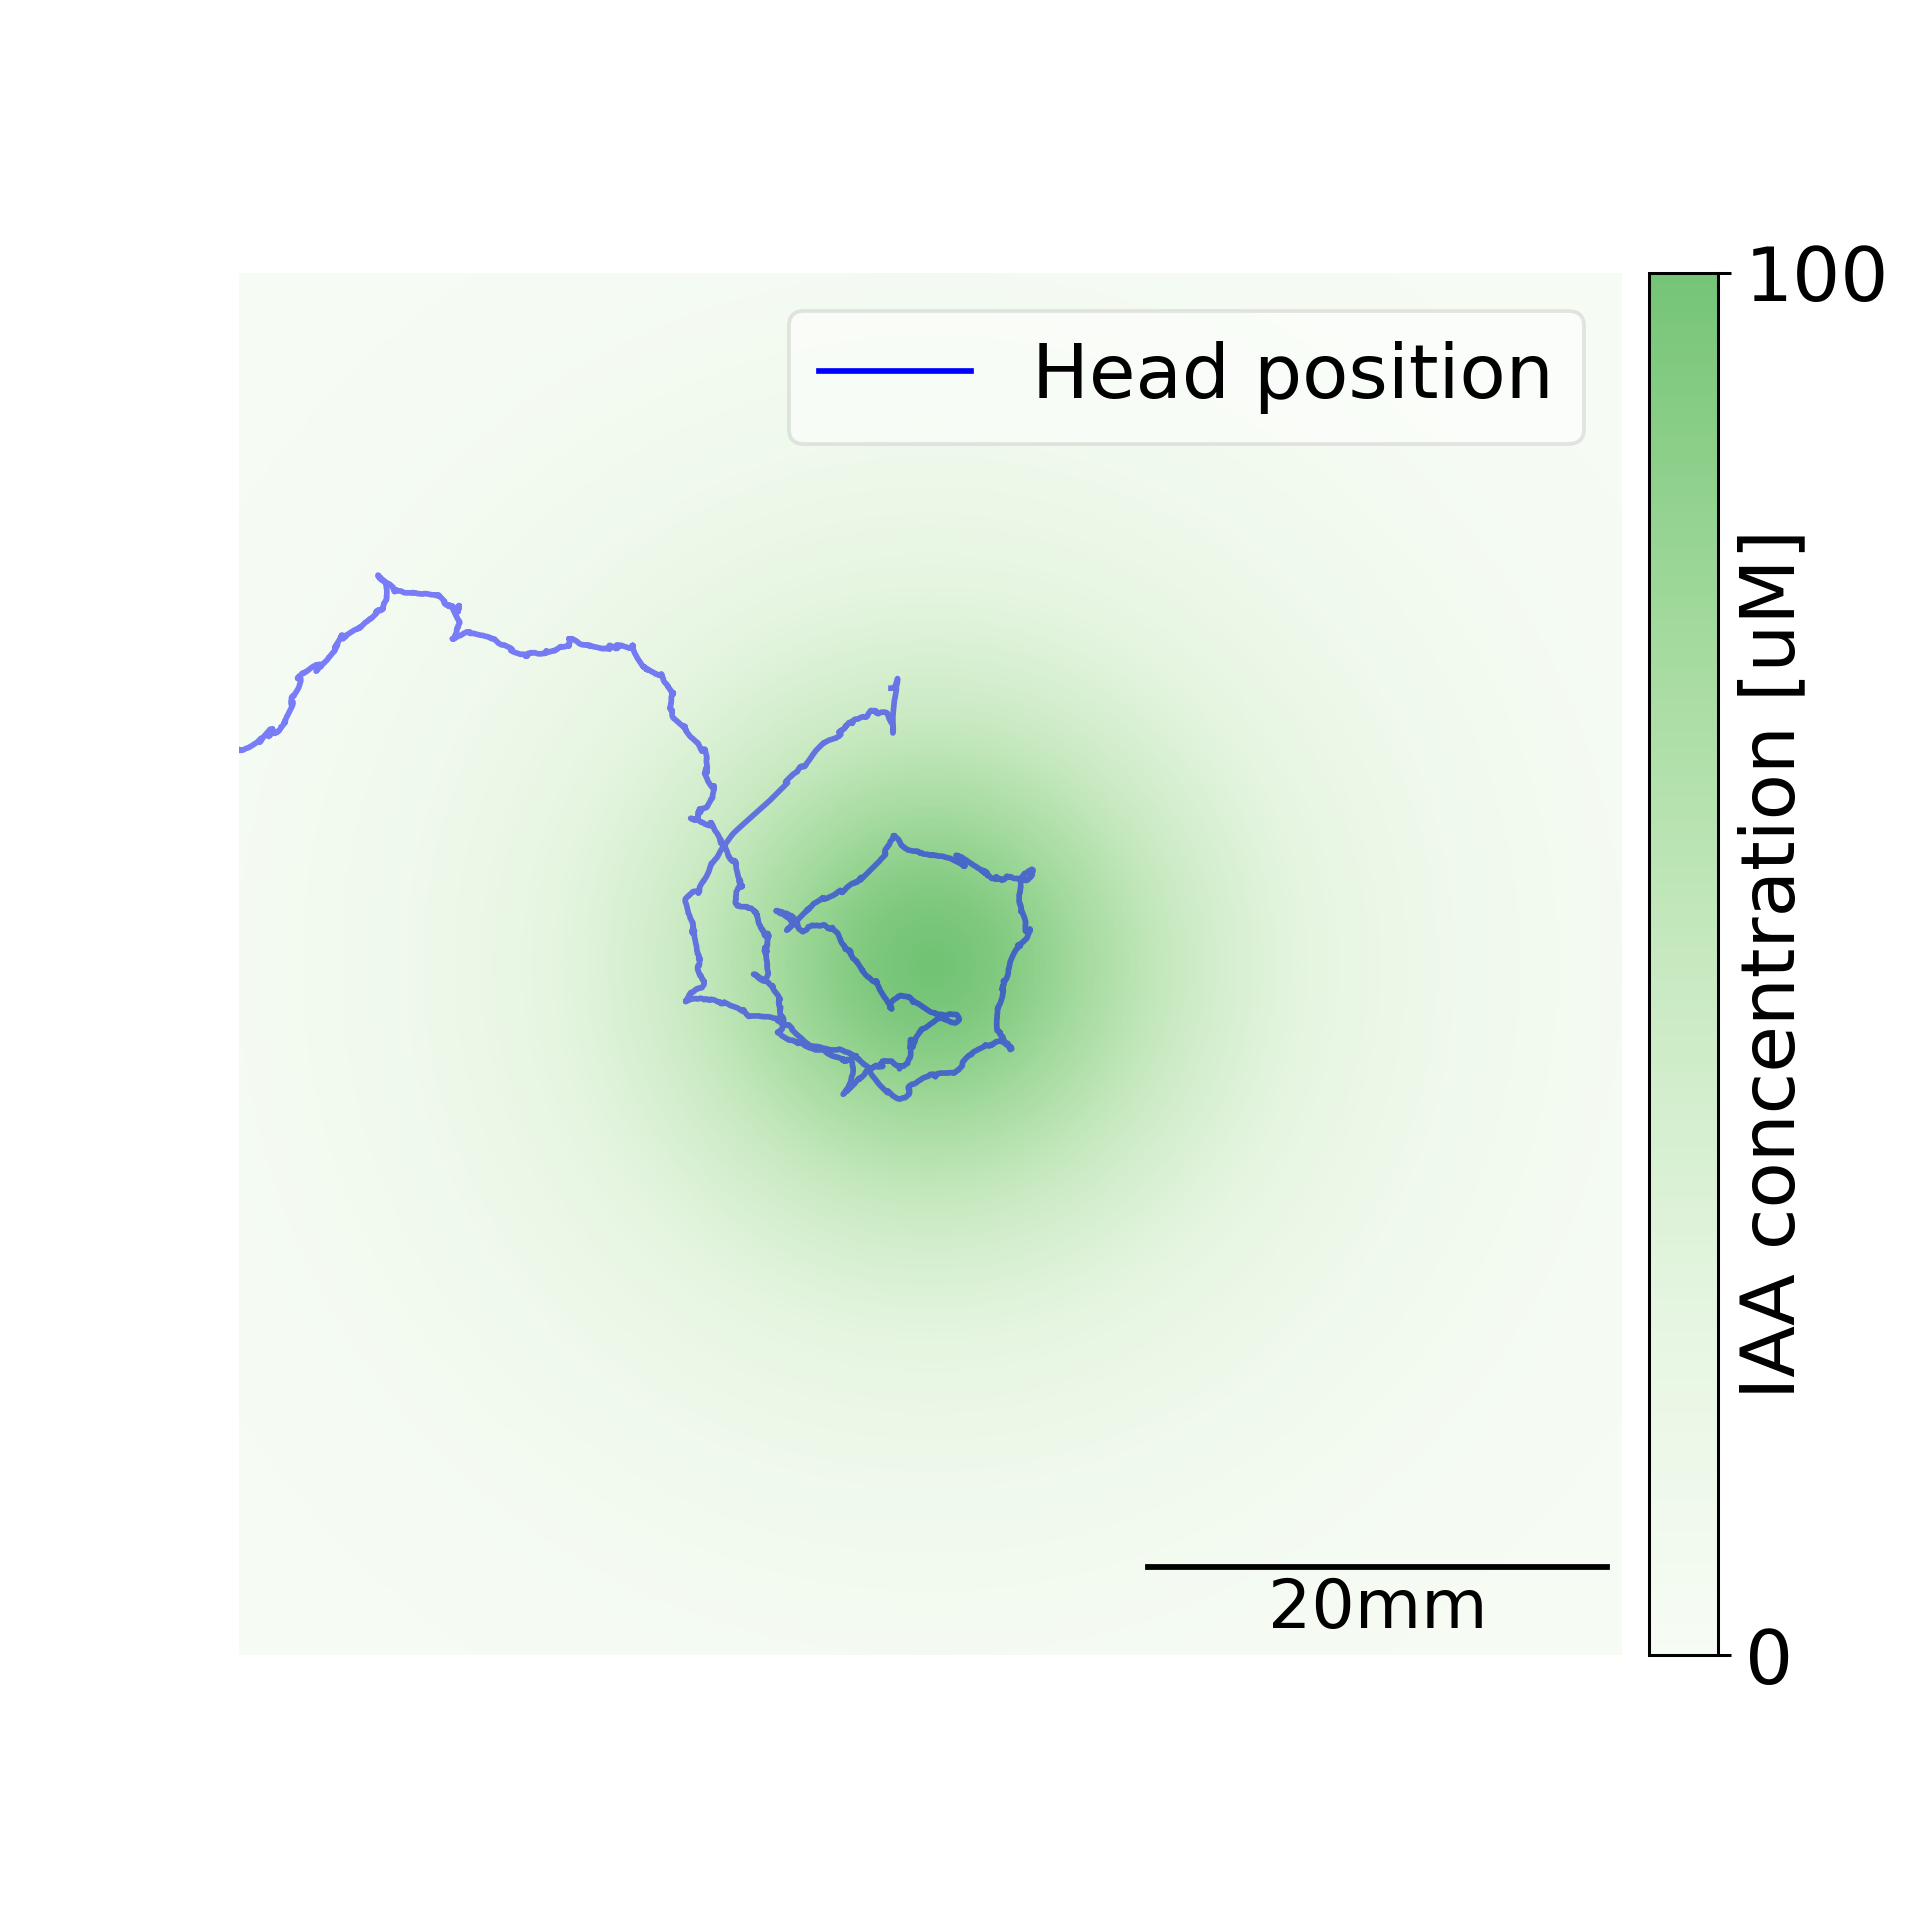

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [31]:
# When plotting using the plot function it's necessary to first smooth the head positions! 
# otherwise it looks very zig-zaggy!
filter_size = 15
smooth_head_positions_x=smooth(head_positions[:,1],filter_size)
smooth_head_positions_y=smooth(head_positions[:,0],filter_size)

# create empty figure and axis
fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(111)
ax.set_rasterization_zorder(2)
#############################
# Create a custom colormaps
# Evaluate an existing colormap from 0.5 (midpoint) to 1 (upper end)
cmap = plt.get_cmap('Greens')
colors = cmap(np.linspace(0, 0.5, cmap.N // 2))
# Create a new colormap from those colors
cmap_lower_half_greens = LinearSegmentedColormap.from_list('Lower Half', colors)
##############################
# plot the simulated odor gradient
real_odor_plot = ax.imshow(real_odor_gradient, cmap=cmap_lower_half_greens, vmin=np.amin(real_odor_gradient), 
                           vmax=np.amax(real_odor_gradient),zorder=0)
# plot the head position in the simulated odor gradient spatial frame
#heads = ax.scatter(x=simulated_odor_max_x-(source_x - head_positions[0:8000,1])/(pixel_per_mm)*sim_pixel_per_mm, \
#                  y=simulated_odor_max_y-(source_y - head_positions[0:8000,0])/(pixel_per_mm)*sim_pixel_per_mm,
#                    color = 'b', alpha=0.1, s=1, label='Head position',zorder=1)

heads = ax.plot(simulated_odor_max_x-(source_x - smooth_head_positions_x[filter_size:8000])/(pixel_per_mm)*sim_pixel_per_mm, \
                  simulated_odor_max_y-(source_y - smooth_head_positions_y[filter_size:8000])/(pixel_per_mm)*sim_pixel_per_mm,
                    color = 'b', alpha=0.5, label='Head position',zorder=1)

# control what of the image is shown
distance_plotted_from_center = 300
ax.set_ylim(500-distance_plotted_from_center,500+distance_plotted_from_center)
ax.set_xlim(500-distance_plotted_from_center,500+distance_plotted_from_center)
ax.invert_yaxis() # TODO TURN THIS ON WITH NEWER DATA
# get the colorbar exactly the same size as the resulting window!
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad='2%')
# add colormap to explain the heatmap, control how many ticks using the ticks parameter
cbar=fig.colorbar(real_odor_plot, 
                  ticks=[np.amin(real_odor_gradient),
                         np.amax(real_odor_gradient)], 
                  cax=cax,
                  fraction=0.046, 
                  pad=0.04)
# change fontsize, to see all parameters that can be changed: print(mpl.rcParams)
#mpl.rcParams['font.size'] = 
#cbar.set_label('IAA concentration [' r'$\mu$' + 'M]', fontsize = 20) # todo - check if really really mM???????????????????????
cbar.set_label('IAA concentration [uM]', fontsize = 20)
ticklabs = cbar.ax.get_yticklabels()
cbar.ax.set_yticklabels([0,100], fontsize=20)
cbar.ax.get_yaxis().labelpad = -40

# add scalebar
fontprops = fm.FontProperties(size=18)
scalebar = AnchoredSizeBar(ax.transData,
                           20*10, '20mm', 
                           'lower right',
                           pad=0.1,
                           color='black',
                           frameon=False,
                           size_vertical=1,
                           fontproperties=fontprops)

ax.add_artist(scalebar)
# hide the ticks and the ticklabels
ax.axis('off')
ax.invert_yaxis()
# show the legend
leg = ax.legend(markerscale = 5, fontsize=20,framealpha=0.5)
# set alpha level of the marker
for lh in leg.legendHandles: 
    lh.set_alpha(1)

os.chdir(home_path)
os.chdir(target_path)
fig.savefig('Fig2di_IAA_chemotaxis.eps', rasterized=True, dpi=300)

<IPython.core.display.Javascript object>


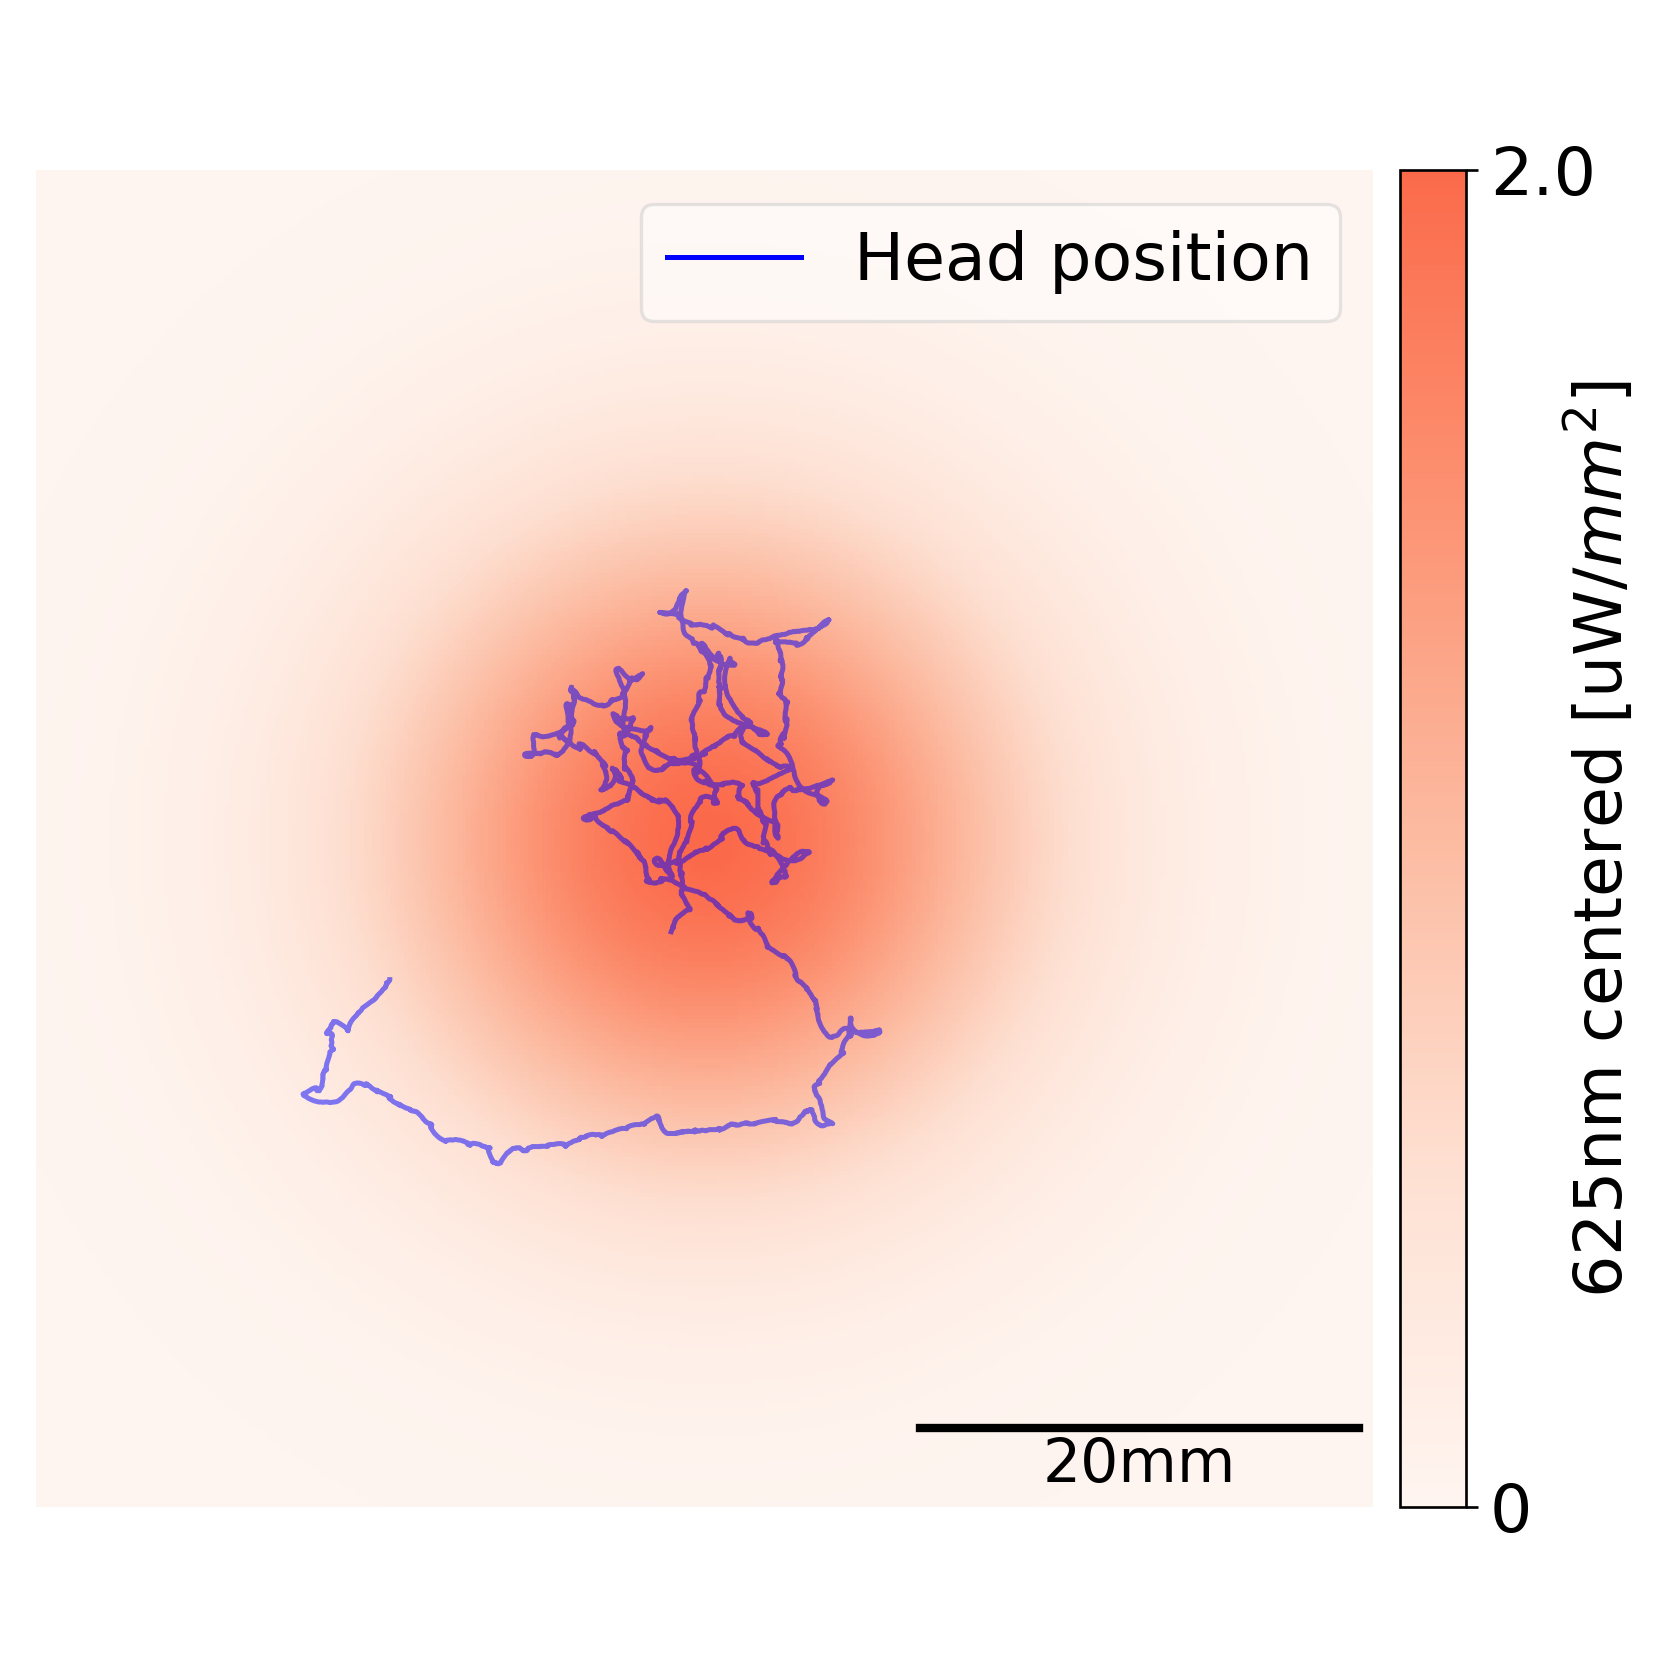

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [15]:
data_path_gauss = Path('data/MS379xMS133/gaussian_VR_arena/20.02.2018_19-09-45_MS379xMS133/')
os.chdir(home_path)
os.chdir(data_path_gauss)

background = imageio.imread('Background.jpg')
head_positions = np.load('SmA-T-heads.npy')
gauss_virtual_arena = np.genfromtxt('640x480_gaussian_centred_animal_pos[250,240,0.0].csv', delimiter=',')
with open(('experiment_settings.json'), 'r') as file:
    experiment_settings = json.load(file)
    pixel_per_mm = experiment_settings['Pixel per mm']
    recording_time = experiment_settings['Recording time']
    fps = experiment_settings['Framerate']

# Get the maximum xy coordinate of the arena (different for different experiment as it depends on the position of the animal)
max_arena_indices_gauss = np.where(gauss_virtual_arena == np.amax(gauss_virtual_arena))
# just the the first one as there are only two anyways and it's only used to center the image
max_arena_indices_gauss = max_arena_indices_gauss[0][0], max_arena_indices_gauss[1][0]
#print(max_arena_index)

# get the virtual arena in uW/mm2
measured_light_intensity = 1.8
# max value in stim file is 40000
gauss_arena_in_uW_mm = gauss_virtual_arena*(measured_light_intensity/40000)

#############################
# Create a custom colormaps
# Evaluate an existing colormap from 0.5 (midpoint) to 1 (upper end)
cmap = plt.get_cmap('Reds')
colors = cmap(np.linspace(0, 0.5, cmap.N // 2))
# Create a new colormap from those colors
cmap_lower_half_reds= LinearSegmentedColormap.from_list('Lower Half', colors)
##############################

# When plotting using the plot function it's necessary to first smooth the head positions! 
# otherwise it looks very zig-zaggy!
filter_size = 15
smooth_head_positions_x=smooth(head_positions[:,1],filter_size)
smooth_head_positions_y=smooth(head_positions[:,0],filter_size)

# create empty figure and axis
fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(111)
ax.set_rasterization_zorder(2)
#ax.imshow(background, cmap='Greys_r')
# plot the virtual arena already in uw/mm
virtual_arena_plot_gauss = ax.imshow(gauss_arena_in_uW_mm, cmap=cmap_lower_half_reds, zorder=0)
# plot the head positions of the animal
#ax.scatter(x=head_positions[:,1], 
#           y=head_positions[:,0], 
#           color = 'b', 
#           alpha=0.1, 
#           s=1, 
#           label='Head position',
#          zorder=1)
ax.plot(   smooth_head_positions_x[filter_size:7999], 
           smooth_head_positions_y[filter_size:7999], 
           color = 'b', 
           alpha=0.5,
           label='Head position',
           zorder=1)

# control what of the image is shown
distance_plotted_from_center = 150
ax.set_ylim(max_arena_indices_gauss[0]-distance_plotted_from_center,max_arena_indices_gauss[0]+distance_plotted_from_center)
ax.set_xlim(max_arena_indices_gauss[1]-distance_plotted_from_center,max_arena_indices_gauss[1]+distance_plotted_from_center)
ax.invert_yaxis()

# get the colorbar exactly the same size as the resulting window!
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad='2%')
# add colormap to explain the heatmap, control how many ticks using the ticks parameter
cbar=fig.colorbar(virtual_arena_plot_gauss, 
                  ticks=[0,np.amax(gauss_arena_in_uW_mm)], 
                  cax=cax,
                  fraction=0.046,
                  pad=0.04)

# change fontsize, to see all parameters that can be changed: print(mpl.rcParams)
#mpl.rcParams['font.size'] = 
#cbar.set_label('625nm centered [' + r'$\mu$' + r'W/$mm^2$]', fontsize = 20)
cbar.set_label('625nm centered [u' + r'W/$mm^2$]', fontsize = 20)
ticklabs = cbar.ax.get_yticklabels()
#cbar.ax.set_yticklabels(ticklabs, fontsize=20)
cbar.ax.set_yticklabels([0,np.round(np.amax(gauss_arena_in_uW_mm))], fontsize=20)
cbar.ax.get_yaxis().labelpad = -10
# add scalebar
fontprops = fm.FontProperties(size=18)
scalebar = AnchoredSizeBar(ax.transData,
                           20*pixel_per_mm, '20mm', 
                           'lower right',
                           pad=0.1,
                           color='black',
                           frameon=False,
                           size_vertical=1,
                           fontproperties=fontprops)

ax.add_artist(scalebar)
# hide the ticks and the ticklabels
ax.axis('off')
# show the legend
leg = ax.legend(markerscale = 5, fontsize=20,framealpha=0.5)
# set alpha level of the marker
for lh in leg.legendHandles: 
    lh.set_alpha(1)
    
fig.tight_layout()

os.chdir(home_path)
os.chdir(target_path)
fig.savefig('Fig2ei_gaussian_arena.eps')#, rasterized=True, dpi=300)

Next up, the volcano plot

<IPython.core.display.Javascript object>


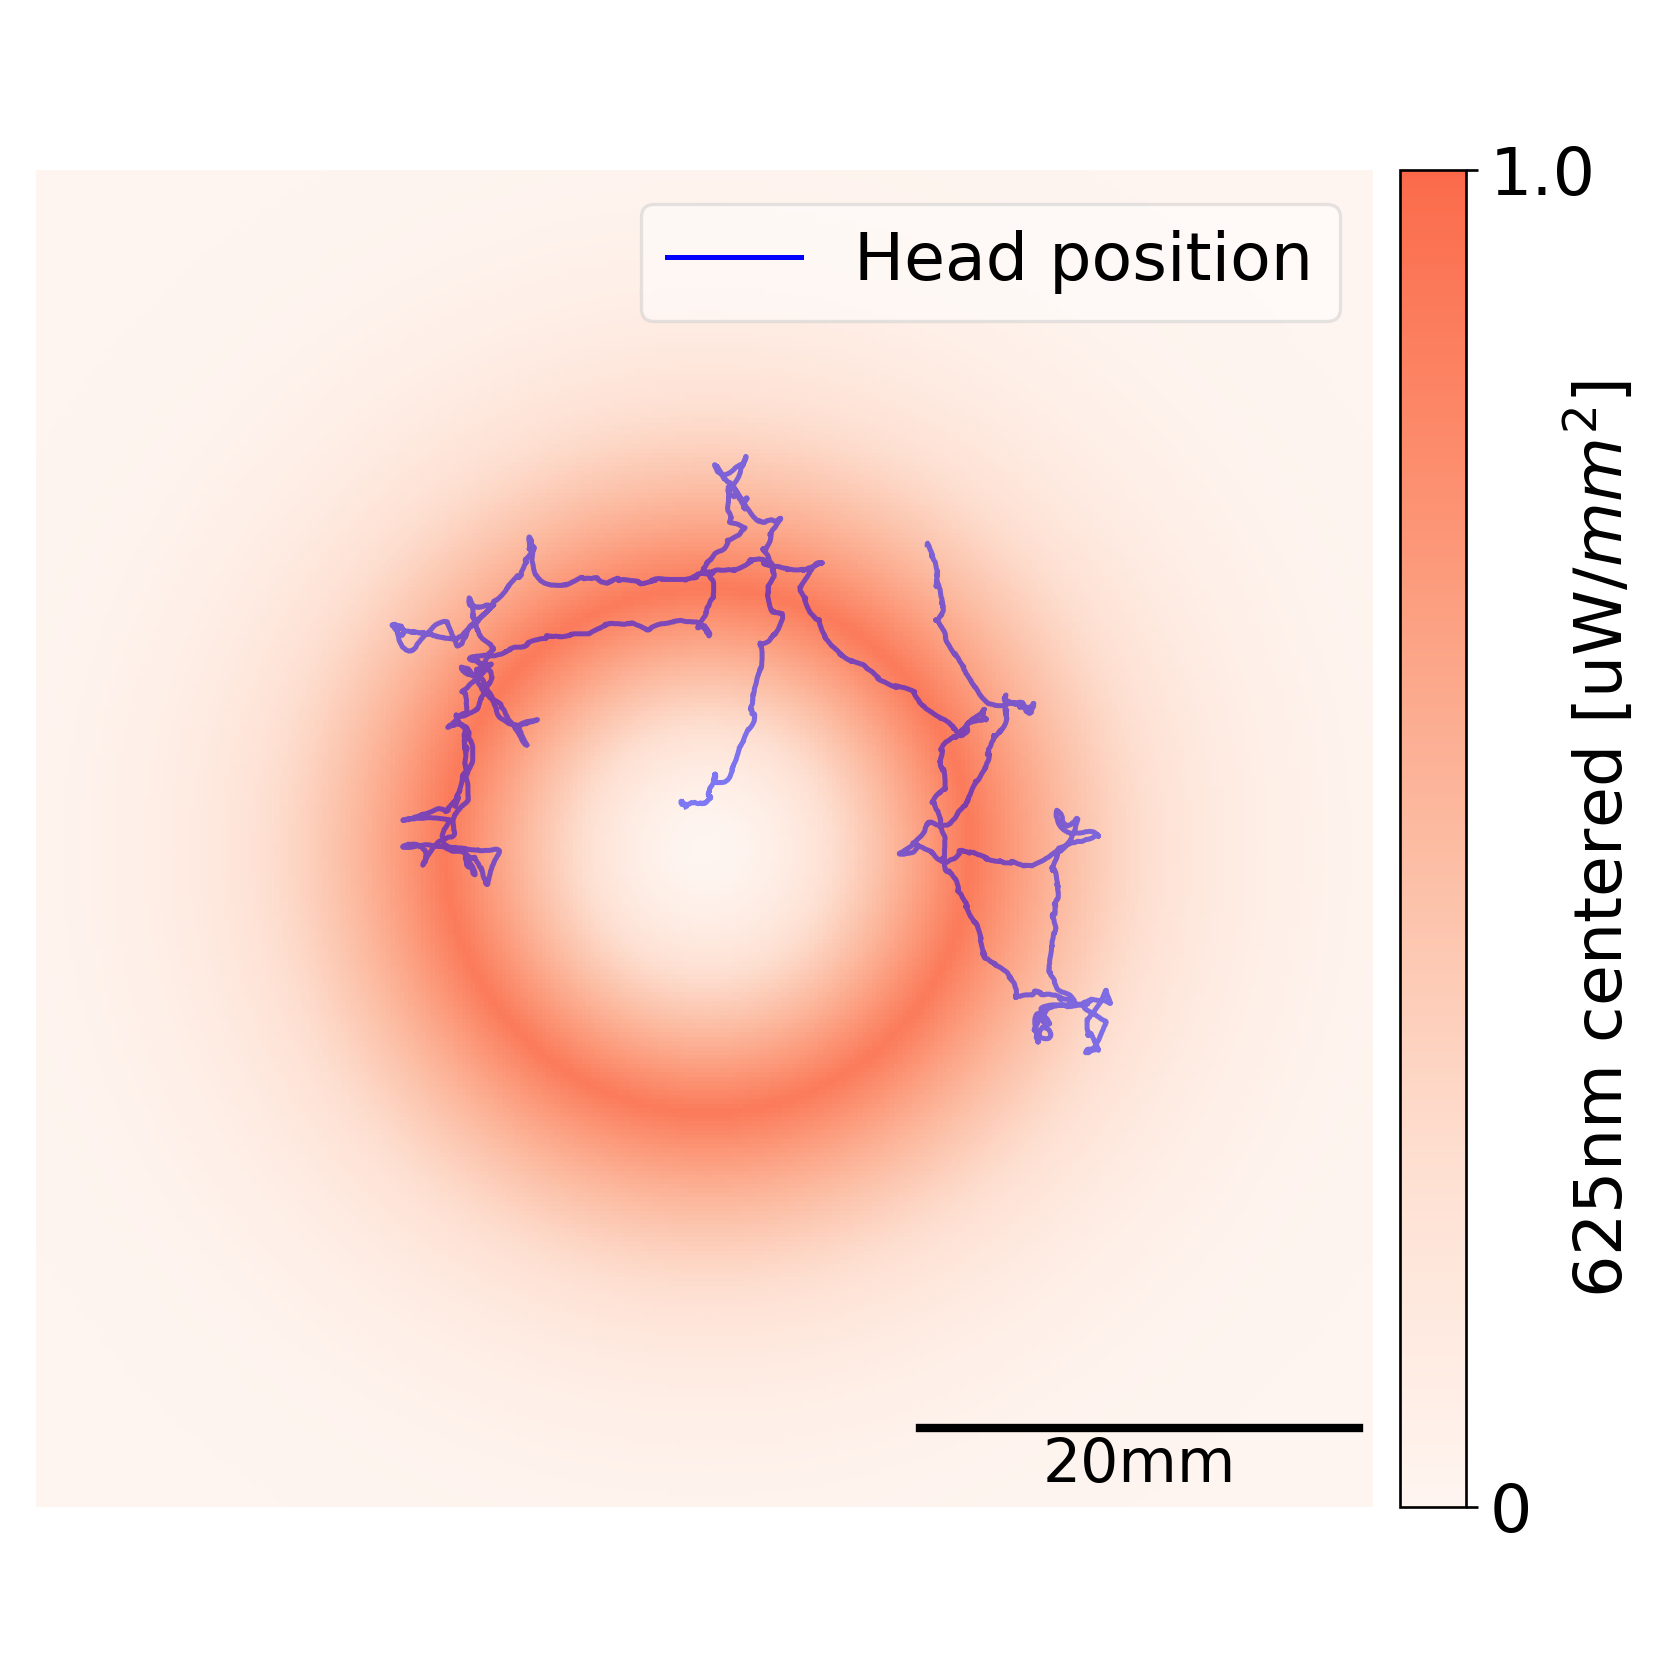

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [16]:
data_path_vulcano = 'data/MS379xMS133/volcano_VR_arena/21.02.2018_17-57-17_MS379xMS133/'
os.chdir(home_path)
os.chdir(data_path_vulcano)


background = imageio.imread('Background.jpg')
head_positions = np.load('SmA-T-heads.npy')
virtual_arena_volcano = np.genfromtxt('640x480_vulcano_animal_pos[320,240,0.0].csv', delimiter=',')
with open(('experiment_settings.json'), 'r') as file:
    experiment_settings = json.load(file)
    pixel_per_mm = experiment_settings['Pixel per mm']
    recording_time = experiment_settings['Recording time']
    fps = experiment_settings['Framerate']

# easier way to find center of arena when it is dependent on the position of the animal > just look up the
# first coordinate for the animal
center_of_arena_vulcano = head_positions[0,:]

# get the virtual arena in uW/mm2
measured_light_intensity = 1.8
# max value in stim file is 40000
arena_in_uW_mm_volcano = virtual_arena_volcano*(measured_light_intensity/40000)

volcano_max_value = np.round(np.amax(arena_in_uW_mm_volcano))

# When plotting using the plot function it's necessary to first smooth the head positions! 
# otherwise it looks very zig-zaggy!
filter_size = 15
smooth_head_positions_x=smooth(head_positions[:,1],filter_size)
smooth_head_positions_y=smooth(head_positions[:,0],filter_size)

# create empty figure and axis
fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(111)
ax.set_rasterization_zorder(2)
#ax.imshow(background, cmap='Greys_r')
# plot the virtual arena already in uw/mm
virtual_arena_plot_vulcano = ax.imshow(arena_in_uW_mm_volcano, cmap=cmap_lower_half_reds, 
                                       vmin=np.amin(arena_in_uW_mm_volcano),
                                      vmax=volcano_max_value,
                                      zorder=0)
# plot the head positions of the animal
#ax.scatter(x=head_positions[:,1], y=head_positions[:,0], 
#           color = 'b', 
#           alpha=0.1, 
#           s=1, 
#           label='Head position',
#           zorder=1)
ax.plot(smooth_head_positions_x[filter_size:7999],
        smooth_head_positions_y[filter_size:7999], 
           color = 'b', 
           alpha=0.5, 
           label='Head position',
           zorder=1)

# control what of the image is shown
distance_plotted_from_center = 150
ax.set_ylim(center_of_arena_vulcano[0]-distance_plotted_from_center, center_of_arena_vulcano[0]+distance_plotted_from_center)
ax.set_xlim(center_of_arena_vulcano[1]-distance_plotted_from_center, center_of_arena_vulcano[1]+distance_plotted_from_center)
ax.invert_yaxis()

# get the colorbar exactly the same size as the resulting window!
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad='2%')
# add colormap to explain the heatmap, control how many ticks using the ticks parameter
cbar=fig.colorbar(virtual_arena_plot_vulcano, 
                  ticks=[0,volcano_max_value],
                  cax=cax,
                  fraction=0.046, 
                  pad=0.04)

# change fontsize, to see all parameters that can be changed: print(mpl.rcParams)
#mpl.rcParams['font.size'] = 
#cbar.set_label('625nm centered [' + r'$\mu$' + r'W/$mm^2$]', fontsize = 20)
cbar.set_label('625nm centered [u' + r'W/$mm^2$]', fontsize = 20)
ticklabs = cbar.ax.get_yticklabels()
#cbar.ax.set_yticklabels(ticklabs, fontsize=20)
cbar.ax.set_yticklabels([0,volcano_max_value], fontsize=20)
cbar.ax.get_yaxis().labelpad = -10
# add scalebar
fontprops = fm.FontProperties(size=18)
scalebar = AnchoredSizeBar(ax.transData,
                           20*pixel_per_mm, '20mm', 
                           'lower right',
                           pad=0.1,
                           color='black',
                           frameon=False,
                           size_vertical=1,
                           fontproperties=fontprops)

ax.add_artist(scalebar)
# hide the ticks and the ticklabels
ax.axis('off')
# show the legend
leg = ax.legend(markerscale = 5, fontsize=20,framealpha=0.5)
# set alpha level of the marker
for lh in leg.legendHandles: 
    lh.set_alpha(1)
plt.draw()
fig.tight_layout()

os.chdir(home_path)
os.chdir(target_path)
fig.savefig('Fig2f_volcano_arena.eps')#, rasterized=True, dpi=300)